### **Stationarity Test**

In [199]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [200]:
stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532074,187.315366,182.792518,186.033057,82488700
2024-01-03,183.150391,184.770668,182.335277,183.120571,58414500
2024-01-04,180.824371,181.997322,179.800520,181.062929,71983600
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500


**Augmented Dickey-Fuller (ADF) Test**

In [201]:
from statsmodels.tsa.stattools import adfuller

# Performed the Augmented Dickey Fuller Test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results: ')
print(f'ADF Statistics: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print("-------------------")
print(f'Critical Values: ')
for key, value in adf_test[4].items():
  print(f'{key}: {round(value, 3)}')

ADF Test Results: 
ADF Statistics: -0.991
p-value: 0.756
-------------------
Critical Values: 
1%: -3.454
5%: -2.872
10%: -2.572




*   If the p-value is small (typically < 0.05), you reject the null hypothesis and conclude that the series is likely stationary.
*   If the p-value is large (typically ≥ 0.05), you fail to reject the null hypothesis, suggesting that the series is non-stationary.


**In this case, p-value = 0.729, which is quite large, so we fail to reject the null hypothesis. This suggests that your time series does not exhibit stationarity, and it is likely non-stationary.**

**Based on the ADF test results, with a high p-value (0.729) and an ADF
statistic (-1.064) not below the critical values, your time series is likely non-stationary**

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**

In [202]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct') # regression = 'c' for constant (level stationarity) & 'ct' for trend

print('KPSS Test Results: ')
print(f'KPSS Statistic: {round(kpss_test[0], 3)}')
print(f'p-value: {round(kpss_test[1], 3)}')
print('-------------------')
print(f'Critical Value')
for key, value in kpss_test[3].items():
  print(f'{key} : {value}')


KPSS Test Results: 
KPSS Statistic: 0.194
p-value: 0.018
-------------------
Critical Value
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216




*   The null hypothesis is that the time series is stationary (specifically trend-stationary, i.e., stationary around a deterministic trend).
*   A low p-value (typically < 0.05) indicates that the null hypothesis is rejected, meaning the time series is non-stationary.
*   A high p-value (typically ≥ 0.05) means you fail to reject the null hypothesis, suggesting the series is stationary.

**Since your p-value = 0.019, which is less than 0.05, we reject the null hypothesis of stationarity. This suggests that your time series is likely non-stationary in terms of trend-stationarity.**




**Conclusion**:
* The KPSS test result suggests that the series is non-stationary with respect to its trend. The rejection of the null hypothesis (stationarity) combined with the KPSS statistic being larger than the critical values indicates that the series likely has a unit root (is non-stationary) and is not stationary around a deterministic trend.

**Kolmogorov-Smirnov (K-S)**

In [203]:
from scipy.stats import ks_2samp

# Generation synthetic data for demonstration
np.random.seed(0)
n=500

# Strictly stationary series: normal distributed random noise
strictly_stationary_series = np.random.normal(0, 1, n)

#  Non - Strictly stationary series: changing variance
non_strictly_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

In [204]:
# Function to split the series into two halves and perform the K-S Test
def ks_test_stationarity(series):
  split = len(series)//2
  series_first_half = series[:split]
  series_second_half = series[split:]
  stats, p_value = ks_2samp(series_first_half, series_second_half)

  return stats, p_value

In [205]:
# Perform the K-S Test on Strictly Stationary Series
stats_strictly_stationary, p_value_strictly_stationary = ks_test_stationarity(strictly_stationary_series)

# Perform the K-S Test on Non-Strictly Stationary Series
stats_non_strictly_stationary, p_value_non_strictly_stationary = ks_test_stationarity(non_strictly_stationary_series)

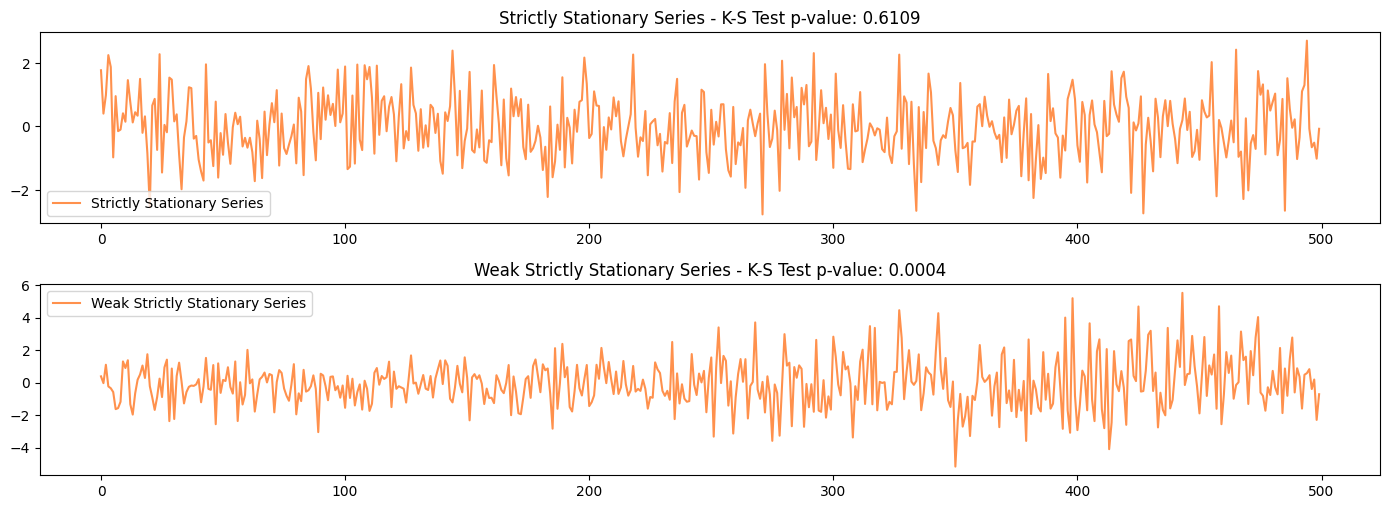

In [206]:
# Plotting the series
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(strictly_stationary_series, label='Strictly Stationary Series', color='#FF914D')
plt.title(f'Strictly Stationary Series - K-S Test p-value: {round(p_value_strictly_stationary, 4)}')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(non_strictly_stationary_series, label='Weak Strictly Stationary Series', color='#FF914D')
plt.title(f'Weak Strictly Stationary Series - K-S Test p-value: {round(p_value_non_strictly_stationary, 4)}')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [207]:
print(f'Strictly Stationary Series - K-S Test Statistics: {stats_strictly_stationary} & p-value: {round(p_value_strictly_stationary, 4)}')
print(f'Weak Stricly Stationary Series - K-S Test Statistics: {stats_non_strictly_stationary} & p-value: {round(p_value_non_strictly_stationary, 4)}')

Strictly Stationary Series - K-S Test Statistics: 0.068 & p-value: 0.6109
Weak Stricly Stationary Series - K-S Test Statistics: 0.184 & p-value: 0.0004


**Conclusion**:
* The strictly stationary series seems to adhere to the stationarity assumption, as the p-value is large and suggests no significant deviation from strict stationarity.
* The weakly stationary series, however, does not appear to be weakly stationary, as the small p-value strongly rejects the null hypothesis of weak stationarity.

### **Make Data Stationary**

In [208]:
# Perform ADF & KPSS Test
def adf_test(series):
  result = adfuller(series)
  print(f'ADF Statistics: {round(result[0], 3)}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():
    print(f'{key}: {round(value, 3)}')

def kpss_test(series):
  result = kpss(series, regression='ct')
  print(f'KPSS Statistic: {round(result[0], 3)}')
  print(f'p-value: {result[1]}')
  for key, value in result[3].items():
    print(f'{key}: {round(value, 3)}')

In [209]:
prices = stock_data['Close']

In [210]:
adf_test(prices)

ADF Statistics: -0.991
p-value: 0.7564161804014151
1%: -3.454
5%: -2.872
10%: -2.572


In [211]:
prices

Ticker,AAPL
Date,
2024-01-02,184.532074
2024-01-03,183.150391
2024-01-04,180.824371
2024-01-05,180.098694
2024-01-08,184.452560
...,...
2025-02-05,232.214691
2025-02-06,232.963867
2025-02-07,227.380005


In [212]:
prices.diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,-1.381683
2024-01-04,-2.326019
2024-01-05,-0.725677
2024-01-08,4.353867
...,...
2025-02-05,-0.329636
2025-02-06,0.749176
2025-02-07,-5.583862


In [213]:
adf_test(prices.diff().dropna())

ADF Statistics: -15.838
p-value: 9.777176821873586e-29
1%: -3.454
5%: -2.872
10%: -2.572


**Transformer**

In [214]:
from scipy import stats

# Log transformation
log_prices = np.log(prices)

# Power Transformation
power_prices = np.sqrt(prices)

# Box-Cox Transformation
prices_array = prices['AAPL'].to_numpy()  # Extract the 'AAPL' column as a 1D array
prices_array = prices_array[prices_array > 0]  # Filter out values <= 0, as boxcox requires positive values
bc_prices, bc_lambda = stats.boxcox(prices_array)  # Apply Box-Cox transformation

In [215]:
adf_test(log_prices)

ADF Statistics: -0.962
p-value: 0.7669809384994489
1%: -3.454
5%: -2.872
10%: -2.572


In [216]:
adf_test(power_prices)

ADF Statistics: -0.975
p-value: 0.7624236976709842
1%: -3.454
5%: -2.872
10%: -2.572


In [217]:
adf_test(bc_prices)

ADF Statistics: -1.028
p-value: 0.7428881541354777
1%: -3.454
5%: -2.872
10%: -2.572


**Detrending :  removing trend component using Linear Trend & Moving Average**

In [218]:
from scipy import signal

# Using linear trend
trend = np.polyfit(np.arange(len(prices)), prices['AAPL'].values, 1) # Access the 'AAPL' column values as a NumPy array
trendline = np.polyval(trend, np.arange(len(prices)))
price_detrend = prices['AAPL'] - trendline

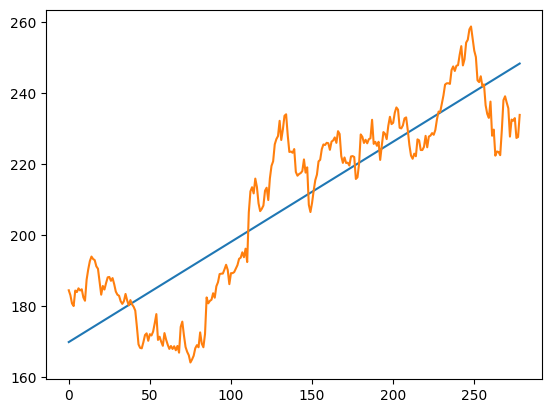

In [219]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [220]:
adf_test(price_detrend)

ADF Statistics: -2.135
p-value: 0.2307959701210568
1%: -3.454
5%: -2.872
10%: -2.572


In [221]:
# using moving average to remove trend
window_size=10
prices_ma = prices.rolling(window=window_size).mean()
price_detrend_ma = prices - prices_ma
price_detrend_ma.dropna(inplace=True)

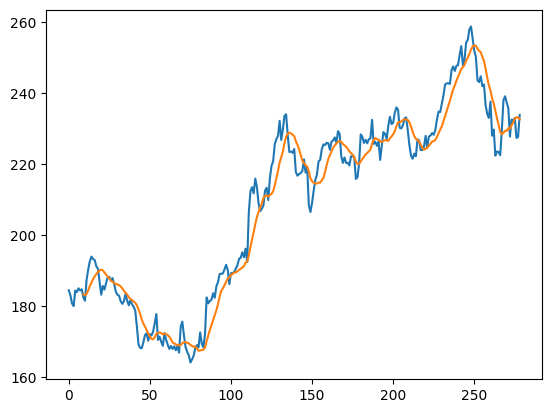

In [222]:
plt.plot(np.arange(len(prices)), prices)
plt.plot(np.arange(len(prices)), prices_ma)
plt.show()

In [223]:
adf_test(price_detrend_ma)

ADF Statistics: -5.151
p-value: 1.1051906188144366e-05
1%: -3.455
5%: -2.872
10%: -2.573



**Seaonal Adjustment: removing seasonal component using STL Decomposition**

In [224]:
stock_data['Close']

Ticker,AAPL
Date,
2024-01-02,184.532074
2024-01-03,183.150391
2024-01-04,180.824371
2024-01-05,180.098694
2024-01-08,184.452560
...,...
2025-02-05,232.214691
2025-02-06,232.963867
2025-02-07,227.380005


In [225]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition using moving average
decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices.AAPL / decomposition.seasonal
prices_adjusted.dropna(inplace=True)

In [226]:
prices_adjusted.shape

(279,)

In [227]:
adf_test(prices_adjusted)

ADF Statistics: -5.021
p-value: 2.017138272008013e-05
1%: -3.456
5%: -2.873
10%: -2.573


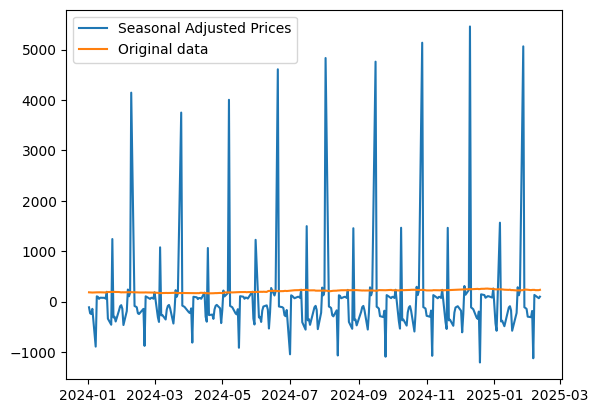

In [228]:
plt.plot(prices_adjusted, label='Seasonal Adjusted Prices')
plt.plot(prices.AAPL, label='Original data')
plt.legend()
plt.show()